## TD5 : Réseau feedforward avec synapses plastiques

### 1. Réseau feedforward


Considérons un réseau feedforward avec une couche de 1000 neurones d'entrée et un neurone de sortie. Le lien entre chaque neurone présynaptique, $i \in (1,1000)$, et le neurone postsynaptique a un poids $w_j$. Tous les neurones de ce réseau sont binaires, ils peuvent être actifs $x_j(t_i)=1$ ou inactifs $x_j(t_i)=0$ à chaque instant.  
<img src="feedforwardNetwork.png" style="width: 400px;"/>
L'activité des neurones postsynaptiques à chaque instant est donnée par la somme de toutes les activités présynaptiques multiplié par le poids synaptique :
$$y(t_i) = \Theta \left( \sum_j w_j * x_j(t_i) - 0.5 \right).$$
La fonction heaviside $\Theta$ est définie comme suit : $\Theta(x) = 0$ si $x<0$, et $\Theta(x) = 1$ if $x\geq0$.<br>
**Indice :** Pour décrire l'activité présynaptique, diviser le vecteur temps en petits intervalles $dt$.  Pour chaque intervalle, un neurone peut être actif $1$ ou inactif $0$.  

#### E1 Créer une activité présynaptique irrégulière. 

Commencez par créer des vecteurs d'activité pour tous les neurones présynaptiques pendant une durée totale de $10$ secondes et avec un intervalle de $0.1$ ms. Chaque neurone devrait déclencher des spikes irrégulières à $\nu = 10$ Hz.   Pour ce faire, tirez autant de nombres aléatoires $\eta_i \in [0,1]$ que d'intervalles de temps et décidez pour chaque intervalle si le neurone est actif ou inactif sur la base de la comparaison suivante : neurone actif $x_j(t_i) = 1$ si $\eta_j(t_i) < \nu * dt$ and inactif $x_j(t_i) = 0$ sinon. <br>

Calculez la taux de décharge et le coefficient de variation pour chaque neurone. 

#### E2 calculer l'activité postsynaptique

L'activité postsynaptique est une fonction de l'activité présynaptique et de l'architecture du réseau.  Exécuter le réseau et calculer l'activité postsynaptique pour chaque intervalle. <br>
**Indice :** Faites un cycle dans le temps et calculez l'activité postsynaptique pour chaque intervalle de temps en fonction de la somme de toutes les activités présynaptiques multipliées par le vecteur de poids.  Initialisez tous les poids synaptiques à $0.1$.

Quelle est le taux de décharge approximative du neurone postsynaptique ? Et quel est son coefficient de variation ? Comment le taux de décharge et le coefficient de variation changent-ils si le poids est augmenté à $0.12$ pour tous les synapses. 


In [128]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nPreNeurons = 1000
T = 10.
dt = 0.0001
timeBins = int(T/dt)
r = 10.
tTime = np.linspace(dt,dt*timeBins,timeBins)

preActivity = np.zeros((nPreNeurons,timeBins))
synapticWeights = np.ones(nPreNeurons)*0.12 #np.random.rand(nPreNeurons)
#synapticWeights = np.random.rand(nPreNeurons)*0.2

#####################################################
# create presynaptic activity : attribute spikes to each presynaptic neuron
for i in range(nPreNeurons):
    randomNumbers = np.random.rand(timeBins)
    preActivity[i][randomNumbers<r*dt] = 1

#####################################################    
# statistics of the pre-synpatic spike trains
for i in range(nPreNeurons):
    spikes = tTime[preActivity[i]==1]
    ISIs = spikes[1:]-spikes[:-1]
    meanISI = np.mean(ISIs)
    sdISI   = np.std(ISIs)
    if i < 10:
        print('mean firing rate of neuron %s is %0.3f Hz, and CV is %0.3f' % (i,1./meanISI,sdISI/meanISI))

#####################################################
# calculate dynamics of the feedforward network
postActivity = np.zeros(timeBins)
print('running network simulation ... ',)
for i in range(timeBins):
    preInput = sum(preActivity[:,i]*synapticWeights)
    if preInput > 0.5:
        postActivity[i] = 1.
    else:
        postActivity[i] = 0.
    if not (i%(1./dt)):
        print('%s s simulated' % (i//(1./dt)))

#####################################################    
# statistics of the post-synpatic spike trains
if sum(postActivity)>0:
    postSpikes = tTime[postActivity==1]
    postISIs = postSpikes[1:]-postSpikes[:-1]
    meanISI = np.mean(postISIs)
    sdISI   = np.std(postISIs)
    print('mean firing rate of the post-synaptic neuron is %0.3f Hz, and CV is %0.3f' % (1./meanISI,sdISI/meanISI))
else:
    print('the postsynaptic neuron is not active')

mean firing rate of neuron 0 is 11.151 Hz, and CV is 0.929
mean firing rate of neuron 1 is 9.040 Hz, and CV is 0.993
mean firing rate of neuron 2 is 10.472 Hz, and CV is 0.850
mean firing rate of neuron 3 is 10.577 Hz, and CV is 1.047
mean firing rate of neuron 4 is 10.519 Hz, and CV is 0.979
mean firing rate of neuron 5 is 10.805 Hz, and CV is 1.109
mean firing rate of neuron 6 is 10.418 Hz, and CV is 0.938
mean firing rate of neuron 7 is 9.187 Hz, and CV is 0.813
mean firing rate of neuron 8 is 10.637 Hz, and CV is 1.018
mean firing rate of neuron 9 is 9.738 Hz, and CV is 0.889
running network simulation ... 
0.0 s simulated
1.0 s simulated
2.0 s simulated
3.0 s simulated
4.0 s simulated
5.0 s simulated
6.0 s simulated
7.0 s simulated
8.0 s simulated
9.0 s simulated
mean firing rate of the post-synaptic neuron is 31.860 Hz, and CV is 0.958


Pour $w = 0.1$, le taux de decharge moyenne est $\nu_{post} \approx 5.5$ Hz. <br>
Pour $w = 0.12$, le taux de decharge moyenne est $\nu_{post} \approx 35$ Hz. <br>

#### E3 Synapses plastiques 

Nous introduisons maintenant une mise à jour du poids synaptique en fonction de l'activité pre- et postsynaptique. Le poids d'une synapse est augmenté par $\eta=0.005$ si les deux neurones pré- et postsynaptiques sont actifs dans le même intervalle de temps. 
$$ w_j(t_{i+1}) = w_j(t_i) + \eta \,\,\, \rm{if} \,\,\, y(t_i)=1  \,\, \rm{and} \,\, x_j(t_i)=1$$ 
Sinon, si les neurones pré- ou postsynaptiques sont actifs seuls, le poids synaptique est diminué par $\eta$.
$$ w_j(t_{i+1}) = w_j(t_i) - \eta \,\,\, \rm{if} \,\,\, y(t_i)=1  \,\, \rm{and} \,\, x_j(t_i)=0$$ 
ou
$$ w_j(t_{i+1}) = w_j(t_i) - \eta \,\,\, \rm{if} \,\,\, y(t_i)=0  \,\, \rm{and} \,\, x_j(t_i)=1$$ 

Le poids synaptique reste constant en l'absence d'activité. 

Initialiser à nouveau tous les poids synaptiques à $0.1$ et effectuer la simulation pendant $10$ s avec un pas de temps de $0.1$ ms. Comme avant, Tous les neurones présynaptiques sont actifs de façon irrégulière et leur taux de décharge est à 10 Hz. <br>
A quoi ressemble la distribution du poids synaptique à la fin de la simulation ? <br>
Comment cette distribution change-t-elle si $100$ neurones déclenchent des spikes synchrones tout au long de la simulation (toujours à 10 Hz)?

mean firing rate of neuron 0 is 18.217 Hz, and CV is 1.005
mean firing rate of neuron 1 is 22.240 Hz, and CV is 0.975
mean firing rate of neuron 2 is 18.356 Hz, and CV is 1.160
mean firing rate of neuron 3 is 20.197 Hz, and CV is 0.858
mean firing rate of neuron 4 is 21.477 Hz, and CV is 0.916
mean firing rate of neuron 5 is 19.114 Hz, and CV is 0.980
mean firing rate of neuron 6 is 20.560 Hz, and CV is 1.091
mean firing rate of neuron 7 is 22.956 Hz, and CV is 0.988
mean firing rate of neuron 8 is 20.345 Hz, and CV is 0.926
mean firing rate of neuron 9 is 20.216 Hz, and CV is 1.017
running network simulation ... 
0.0 s simulated
1.0 s simulated
2.0 s simulated
3.0 s simulated
4.0 s simulated
5.0 s simulated
6.0 s simulated
7.0 s simulated
8.0 s simulated
9.0 s simulated
mean firing rate of the post-synaptic neuron is 55.172 Hz, and CV is 1.220


(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1000.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([-0.5 , -0.48, -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34,
        -0.32, -0.3 , -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16,
        -0.14, -0.12, -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,
         0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,
         0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,
         0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ]),
 <a list of 50 Patch objects>)

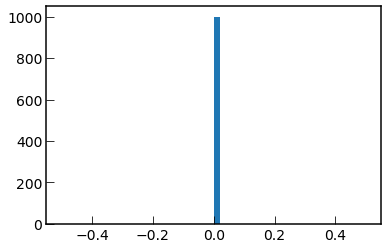

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nPreNeurons = 1000
T = 10.
dt = 0.0001
timeBins = int(T/dt)
r = 20.
tTime = np.linspace(dt,dt*timeBins,timeBins)

# learning parameters
eta = 0.005
interestingNeurons = 0

preActivity = np.zeros((nPreNeurons,timeBins))
synapticWeights = np.zeros((nPreNeurons,timeBins)) 
initialWeights = np.ones(nPreNeurons)*0.1 #np.random.rand(nPreNeurons)
#synapticWeights = np.random.rand(nPreNeurons)*0.3

synapticWeights[:,0] = np.copy(initialWeights)

#####################################################
# create presynaptic activity : attribute spikes to each presynaptic neuron
# first 'interestingNeurons' firing synhronous action potentials 
randomNumbers = np.random.rand(timeBins)
for i in range(interestingNeurons):
    preActivity[i][randomNumbers<r*dt] = 1.

# rest of the neurons : not synchronous 
for i in range(interestingNeurons,nPreNeurons):
    randomNumbers = np.random.rand(timeBins)
    preActivity[i][randomNumbers<r*dt] = 1.
    
#####################################################    
# statistics of the pre-synpatic spike trains
for i in range(nPreNeurons):
    spikes = tTime[preActivity[i]==1]
    ISIs = spikes[1:]-spikes[:-1]
    meanISI = np.mean(ISIs)
    sdISI   = np.std(ISIs)
    if i < 10:
        print('mean firing rate of neuron %s is %0.3f Hz, and CV is %0.3f' % (i,1./meanISI,sdISI/meanISI))

#####################################################
# calculate dynamics of the feedforward network
postActivity = np.zeros(timeBins)
print('running network simulation ... ',)
for i in range(timeBins-1):
    preInput = sum(preActivity[:,i]*synapticWeights[:,i])
    if preInput > 0.5:
        postActivity[i] = 1.
    else:
        postActivity[i] = 0.
    # update synaptic weights
    # synaptic increase LTP
    # was  presynaptic spike fired during the LTP window
    if i < (timeBins-1):
        synapticWeights[:,(i+1)] = synapticWeights[:,i]
        if postActivity[i]==1.:
            LTPmask = (preActivity[:,i]==1)
            synapticWeights[:,(i+1)][LTPmask] = synapticWeights[:,i][LTPmask]+eta
            synapticWeights[:,(i+1)][synapticWeights[:,(i+1)]>1.]=1.
            #
            LTDmask = (preActivity[:,i]==0)
            synapticWeights[:,(i+1)][LTDmask] = synapticWeights[:,i][LTDmask]-eta
            synapticWeights[:,(i+1)][synapticWeights[:,(i+1)]<0.]=0.
        elif postActivity[i]==0.:
            LTDmask2 = (preActivity[:,i]==1)
            synapticWeights[:,(i+1)][LTDmask2] = synapticWeights[:,i][LTDmask2]-eta
            synapticWeights[:,(i+1)][synapticWeights[:,(i+1)]<0.]=0.
    #if np.any(postActivity[(i-nLTD):i]):
    #    LTDmask = (preActivity[:,i]==1.)
    #    #print(sum(LTDmask))
    #    synapticWeights[LTDmask]-=eta
    #    synapticWeights[synapticWeights<0.]=0.
    if not (i%(1./dt)):
        print('%s s simulated' % (i//(1./dt)))
        
        

#####################################################    
# statistics of the post-synpatic spike trains
if sum(postActivity)>0:
    postSpikes = tTime[postActivity==1]
    postISIs = postSpikes[1:]-postSpikes[:-1]
    meanISI = np.mean(postISIs)
    sdISI   = np.std(postISIs)
    print('mean firing rate of the post-synaptic neuron is %0.3f Hz, and CV is %0.3f' % (1./meanISI,sdISI/meanISI))
else:
    print('the postsynaptic neuron is not active')

#plt.hist(initialWeights,bins=100)
plt.hist(synapticWeights[:,-1],bins=50)
#plt.hist(synapticWeights,bins=50,la)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


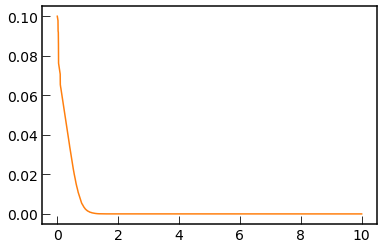

In [2]:
plt.plot(tTime,np.mean(synapticWeights[:interestingNeurons],0))
plt.plot(tTime,np.mean(synapticWeights[interestingNeurons:],0))

Tous les poids synaptiques sont déprimés, du poids 0, à la fin de la simulation. 

mean firing rate of neuron 0 is 21.494 Hz, and CV is 1.079
mean firing rate of neuron 1 is 21.494 Hz, and CV is 1.079
mean firing rate of neuron 2 is 21.494 Hz, and CV is 1.079
mean firing rate of neuron 3 is 21.494 Hz, and CV is 1.079
mean firing rate of neuron 4 is 21.494 Hz, and CV is 1.079
mean firing rate of neuron 5 is 21.494 Hz, and CV is 1.079
mean firing rate of neuron 6 is 21.494 Hz, and CV is 1.079
mean firing rate of neuron 7 is 21.494 Hz, and CV is 1.079
mean firing rate of neuron 8 is 21.494 Hz, and CV is 1.079
mean firing rate of neuron 9 is 21.494 Hz, and CV is 1.079
running network simulation ... 
0.0 s simulated
1.0 s simulated
2.0 s simulated
3.0 s simulated
4.0 s simulated
5.0 s simulated
6.0 s simulated
7.0 s simulated
8.0 s simulated
9.0 s simulated
mean firing rate of the post-synaptic neuron is 21.826 Hz, and CV is 1.090


(array([900.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 100.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

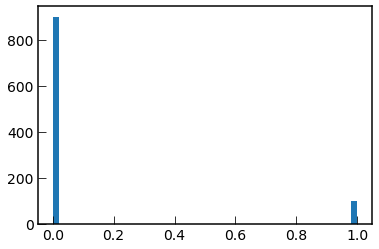

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nPreNeurons = 1000
T = 10.
dt = 0.0001
timeBins = int(T/dt)
r = 20.
tTime = np.linspace(dt,dt*timeBins,timeBins)

# learning parameters
eta = 0.005
interestingNeurons = 100

preActivity = np.zeros((nPreNeurons,timeBins))
synapticWeights = np.zeros((nPreNeurons,timeBins)) 
initialWeights = np.ones(nPreNeurons)*0.1 #np.random.rand(nPreNeurons)
#synapticWeights = np.random.rand(nPreNeurons)*0.3

synapticWeights[:,0] = np.copy(initialWeights)

#####################################################
# create presynaptic activity : attribute spikes to each presynaptic neuron
# first 'interestingNeurons' firing synhronous action potentials 
randomNumbers = np.random.rand(timeBins)
for i in range(interestingNeurons):
    preActivity[i][randomNumbers<r*dt] = 1.

# rest of the neurons : not synchronous 
for i in range(interestingNeurons,nPreNeurons):
    randomNumbers = np.random.rand(timeBins)
    preActivity[i][randomNumbers<r*dt] = 1.
    
#####################################################    
# statistics of the pre-synpatic spike trains
for i in range(nPreNeurons):
    spikes = tTime[preActivity[i]==1]
    ISIs = spikes[1:]-spikes[:-1]
    meanISI = np.mean(ISIs)
    sdISI   = np.std(ISIs)
    if i < 10:
        print('mean firing rate of neuron %s is %0.3f Hz, and CV is %0.3f' % (i,1./meanISI,sdISI/meanISI))

#####################################################
# calculate dynamics of the feedforward network
postActivity = np.zeros(timeBins)
print('running network simulation ... ',)
for i in range(timeBins-1):
    preInput = sum(preActivity[:,i]*synapticWeights[:,i])
    if preInput > 0.5:
        postActivity[i] = 1.
    else:
        postActivity[i] = 0.
    # update synaptic weights
    # synaptic increase LTP
    # was  presynaptic spike fired during the LTP window
    if i < (timeBins-1):
        synapticWeights[:,(i+1)] = synapticWeights[:,i]
        if postActivity[i]==1.:
            LTPmask = (preActivity[:,i]==1)
            synapticWeights[:,(i+1)][LTPmask] = synapticWeights[:,i][LTPmask]+eta
            synapticWeights[:,(i+1)][synapticWeights[:,(i+1)]>1.]=1.
            #
            LTDmask = (preActivity[:,i]==0)
            synapticWeights[:,(i+1)][LTDmask] = synapticWeights[:,i][LTDmask]-eta
            synapticWeights[:,(i+1)][synapticWeights[:,(i+1)]<0.]=0.
        elif postActivity[i]==0.:
            LTDmask2 = (preActivity[:,i]==1)
            synapticWeights[:,(i+1)][LTDmask2] = synapticWeights[:,i][LTDmask2]-eta
            synapticWeights[:,(i+1)][synapticWeights[:,(i+1)]<0.]=0.
    #if np.any(postActivity[(i-nLTD):i]):
    #    LTDmask = (preActivity[:,i]==1.)
    #    #print(sum(LTDmask))
    #    synapticWeights[LTDmask]-=eta
    #    synapticWeights[synapticWeights<0.]=0.
    if not (i%(1./dt)):
        print('%s s simulated' % (i//(1./dt)))
        
        

#####################################################    
# statistics of the post-synpatic spike trains
if sum(postActivity)>0:
    postSpikes = tTime[postActivity==1]
    postISIs = postSpikes[1:]-postSpikes[:-1]
    meanISI = np.mean(postISIs)
    sdISI   = np.std(postISIs)
    print('mean firing rate of the post-synaptic neuron is %0.3f Hz, and CV is %0.3f' % (1./meanISI,sdISI/meanISI))
else:
    print('the postsynaptic neuron is not active')

#plt.hist(initialWeights,bins=100)
plt.hist(synapticWeights[:,-1],bins=50)
#plt.hist(synapticWeights,bins=50,la)

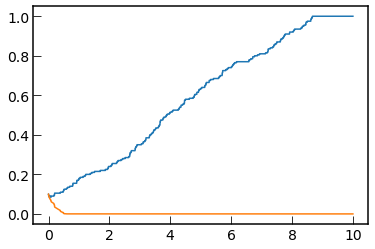

In [5]:
plt.plot(tTime,np.mean(synapticWeights[:interestingNeurons],0))
plt.plot(tTime,np.mean(synapticWeights[interestingNeurons:],0))

Les poids de la population synchrone sont 1 et le reste des poids sont 0. 